## M5 Assignment
### Team Members: Dengyi Liu, Yuchen Wang

### Introduction:
* In this assignment we completed the required thirteen questions.
* We tried our best to complete several questions similar to "algorithms", that is, creating functions to calculate the metrics of various evaluation models.
* In the process of completing the homework, we also found some problems, that is, the built-in function in the last question may be outdated, and at the same time, the AUC calculated by using the built-in function is not consistent with the AUC calculated by the function we created ourselves.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Read the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ycwang15/Data-Science/main/M5/M5_Data.csv')
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


### Crosstab()

In [3]:
y_actual = df['class']
y_predict = df['scored.class']

In [4]:
confusion_matrix = pd.crosstab(y_actual, y_predict,rownames=['actual'],colnames=['predict'])
print(confusion_matrix)

predict    0   1
actual          
0        119   5
1         30  27


### Extract

In [5]:
tp = confusion_matrix.iloc[1,1]
tn = confusion_matrix.iloc[0,0]
fp = confusion_matrix.iloc[0,1]
fn = confusion_matrix.iloc[1,0]

confusion_dict = {'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn}
print(confusion_dict)

{'TP': 27, 'FP': 5, 'TN': 119, 'FN': 30}


### Accuracy Function

In [6]:
def accuracy_function(actual,predict):
    if len(actual) != len(predict):
        print('length error') 
    
    correct_predictions = 0
    for i in range(len(actual)):
        if actual[i] == predict[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(actual)
    
    return accuracy

### Precision Function

In [7]:
def precision_function(actual,predict):
    if len(actual) != len(predict):
        print('length error') 
    
    true_positives = 0
    false_positives = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predict[i] == 1:
            true_positives += 1
        elif actual[i] == 0 and predict[i] == 1:
            false_positives += 1
    precision = true_positives / (true_positives + false_positives)
    return precision

### Recall Function

In [8]:
def recall_function(actual,predict):
    if len(actual) != len(predict):
        print('length error') 
    
    true_positives = 0
    false_negatives = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predict[i] == 1:
            true_positives += 1
        elif actual[i] == 1 and predict[i] == 0:
            false_negatives += 1
    recall = true_positives / (true_positives + false_negatives)
    return recall

### Specificity Function

In [9]:
def specificity_function(actual,predict):
    if len(actual) != len(predict):
        print('length error') 
    
    true_negatives = 0
    false_positives = 0
    for i in range(len(actual)):
        if actual[i] == 0 and predict[i] == 0:
            true_negatives += 1
        elif actual[i] == 0 and predict[i] == 1:
            false_positives += 1
    specificity = true_negatives / (true_negatives + false_positives)
    return specificity

### F1 Score Function

In [10]:
def f1_score(actual,predict):
    if len(actual) != len(predict):
        print('length error') 
    
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predict[i] == 1:
            true_positives += 1
        elif actual[i] == 0 and predict[i] == 1:
            false_positives += 1
        elif actual[i] == 1 and predict[i] == 0:
            false_negatives += 1
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

### ROC & AUC

In [11]:
threshold = np.arange(0, 1.001, 0.001)

def roc_plot(actual, predict):
    fpr_all = []
    tpr_all = []
    if len(actual) != len(predict):
        print('length error')

    for i in threshold:
        mask = np.where(df['scored.probability'] > i, True, False)
        true_positives = sum(actual[mask] == 1)
        false_positives = sum(actual[mask] == 0)
        total_positives = sum(actual)
        total_negatives = len(actual) - total_positives

        fpr = false_positives / total_negatives
        tpr = true_positives / total_positives

        fpr_all.append(fpr)
        tpr_all.append(tpr)
    
        auc = 0
        for j in range(1, len(fpr_all)):
            auc += abs((tpr_all[j-1] + tpr_all[j]) * (fpr_all[j] - fpr_all[j-1]) / 2)

    plt.plot(fpr_all, tpr_all, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random Line")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

### Apply each function

**Accuracy Function**

In [12]:
accuracy_function(df['class'],df['scored.class'])

0.8066298342541437

**Precision Function**

In [13]:
precision_function(df['class'],df['scored.class'])

0.84375

**Recall Function**

In [14]:
recall_function(df['class'],df['scored.class'])

0.47368421052631576

**Specificity Function**

In [15]:
specificity_function(df['class'],df['scored.class'])

0.9596774193548387

**F1 Score Function**

In [16]:
f1_score(df['class'],df['scored.class'])

0.6067415730337079

**ROC & AUC Function**

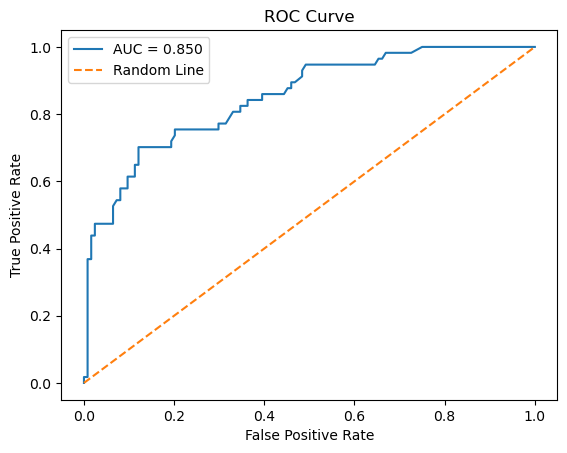

In [17]:
roc_plot(df['class'],df['scored.class'])

### Compare

In [18]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report
)

**Accuracy Score**

In [19]:
accuracy_score(df['class'],df['scored.class'])

0.8066298342541437

**Precision Score**

In [20]:
precision_score(df['class'],df['scored.class'])

0.84375

**Recall Score**

In [21]:
recall_score(df['class'],df['scored.class'])

0.47368421052631576

**F1 Score**

In [22]:
f1_score(df['class'],df['scored.class'])

0.6067415730337079

**Confusion Matrix**

In [23]:
confusion_matrix(df['class'],df['scored.class'])

array([[119,   5],
       [ 30,  27]], dtype=int64)

**Classification_Report**

In [24]:
print(classification_report(df['class'],df['scored.class']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



**Observation**
* We think the advantage of the built-in function is that we can call them directly, and use the classification_report function to compare the scores of different metrics, which is more intuitive. But if only focus on the results, there is no difference between the function we created ourselves and the built-in function.

### Plot

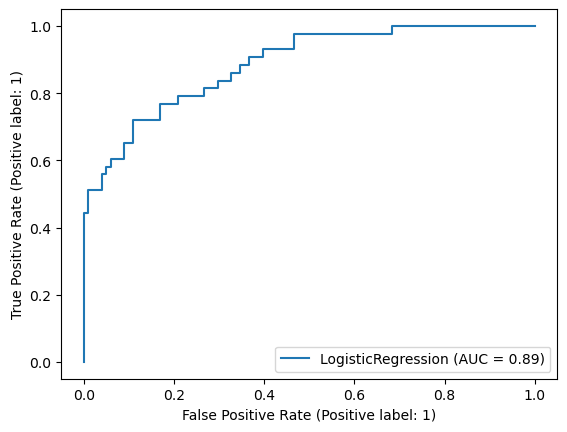

In [25]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

X = df.drop(['class', 'scored.class', 'scored.probability'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

# Plot the ROC curve
plot_roc_curve(model, X_train, y_train)
plt.show()


In [26]:
auc_score = roc_auc_score(df['class'],df['scored.class'])
auc_score

0.7166808149405772

**Observations**
* The versions of auc() and plot_roc_curve mentioned in the guidelines given by Professor Topor may be outdated. We must first train a model, and then add the model, independent variables and dependent variables to the plot_roc_curve function to obtain corresponding results.

* At the same time, in the last question, our graph is for the training set, so the auc is as high as 0.89, but when we calculate with the actual and predict columns in the dataset, the roc is only 0.71. This is very different from the 0.85 we calculated In and out, we didn't find the exact reason for this.

___